In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/MTA/DATA.csv")


I am passing the content of the csv file into a Pandas DataFrame object to visualize and analyze the information within

In [ ]:
df.head()

,TripId,Clientid,Status,ProviderType,Outcome,Tripdate,RequestTime,PromiseTime,ProviderId,APtime,APtime1,ADtime,Anchor,PickCounty,PickZip,DropCounty,DropZip,TripMiles
0,1,18958,CX,E-Hail,Early Cancel,2022-04-01,06:30,05:35,NaN,00:00,00:00,00:00,P,Kings County,11228,Kings County,11219,0.00
1,2,33563,S,E-Hail,Authorized,2022-04-01,23:00,22:03,ISA,00:00,00:00,00:00,A,Richmond County,10308,Richmond County,10307,7.63
2,9,51426,CX,E-Hail,Early Cancel,2022-04-01,15:30,14:48,NaN,00:00,00:00,00:00,P,New York County,10022,Richmond County,10301,0.00
3,20,37638,CX,E-Hail,Early Cancel,2022-04-01,14:30,14:30,NaN,00:00,00:00,00:00,P,Kings,11209,Richmond,10314,0.00
4,21,36285,S,Primary,Completed,2022-04-01,09:30,09:30,MAG,09:38,00:00,09:55,P,Kings,11203,Kings,11226,0.90


In [ ]:
df.tail()

,TripId,Clientid,Status,ProviderType,Outcome,Tripdate,RequestTime,PromiseTime,ProviderId,APtime,APtime1,ADtime,Anchor,PickCounty,PickZip,DropCounty,DropZip,TripMiles
1164008,341231,52945,TAXI,E-Hail,Authorized,2022-04-08,15:20,00:00,NaN,00:00,00:00,00:00,P,Queens,11361,Queens,11358,0.00
1164009,564342,613,S,Primary,Completed,2022-04-14,09:47,09:47,MVP,09:46,09:33,10:16,P,Bronx,10475,Westchester,10701,7.65
1164010,667270,27879,DELETED,Deleted,Fixed Route-Exclude,2022-04-16,25:45,00:00,LIS,00:00,00:00,00:00,P,New York,10020,Kings,11206,0.00
1164011,324756,40067,S,Primary,Completed,2022-04-08,12:15,12:15,GVC,12:25,11:54,12:47,P,New York,10065,New York,10003,3.39
1164012,787404,21058,CX_L,E-Hail,Late Cancel,2022-04-19,21:00,21:00,NaN,00:00,00:00,00:00,P,Richmond,10301,Kings,11226,0.00


After calling the methods head() and tail() to find out what the first five the dataset looks like, I understood that many of the E-Hail service providers, regardless of the outcome of the trip, have unavailable values under the attribute, ProviderId. I will proceed to clean the dataset from redundant or annecessary columns, such as unknown attribute, replace NaN values with zeros, substitute APtime with Departure_Pickup (departure from pickup location), modify APtime1 (arrival at pickup location) to Arrival_Pickup, change ADtime (arrival at destination) into Arrival_Destination.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164013 entries, 0 to 1164012
Data columns (total 18 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   TripId        1164013 non-null  int64  
 1   Clientid      1164013 non-null  int64  
 2   Status        1164013 non-null  object 
 3   ProviderType  1164013 non-null  object 
 4   Outcome       1164013 non-null  object 
 5   Tripdate      1164013 non-null  object 
 6   RequestTime   1164013 non-null  object 
 7   PromiseTime   1164013 non-null  object 
 8   ProviderId    543476 non-null   object 
 9   APtime        1164012 non-null  object 
 10  APtime1       1164013 non-null  object 
 11  ADtime        1164012 non-null  object 
 12  Anchor        1164013 non-null  object 
 13  PickCounty    1138339 non-null  object 
 14  PickZip       1138336 non-null  object 
 15  DropCounty    1138338 non-null  object 
 16  DropZip       1138336 non-null  object 
 17  TripMiles     1164013 non-n

In [ ]:
df['ProviderId'] = df['ProviderId'].fillna(0)

In [ ]:
df.rename(columns={ 'APtime': 'Departure_Pickup', 'APtime1':'Arrival_Pickup', 'ADtime':'Arrival_Destination'}, inplace=True)

In [ ]:
df.drop(columns=["ProviderId"], inplace=True, errors='ignore')

In [ ]:
df.drop(columns=["Clientid"], inplace=True, errors='ignore')

In [ ]:
df.drop(columns=["TripId"], inplace=True, errors='ignore')

I drop columns like TripId, Clientid, and ProviderId because they are not critical to my analysis


To answer the first question, I first need to convert Tripdate values from its current format into days of the week. Next, I will display successful trips by provider and day of the week.

In [ ]:
df['Day_of_week'] = df['Tripdate'].apply(lambda x: pd.Timestamp(x).day_name())

I am using the lambda function inside the apply method to convert timestamp into weekly days

In [ ]:
df.drop(columns=["Tripdate"], inplace=True, errors='ignore')

In [ ]:
column_to_move = df.pop("Day_of_week")
df.insert(3, "Day_of_week", column_to_move)

In [ ]:
df['Day_of_trip'] = df['Day_of_week'].apply(lambda x: 'Weekday' if x != 'Saturday' and x != 'Sunday' else 'Weekend')

Here, I convert every day different from both Saturday and Sunday into 'Weekday'. Every other day will be re-written as 'Weekend'

In [ ]:
column_to_move = df.pop("Day_of_trip")
df.insert(4, "Day_of_trip", column_to_move)

In [ ]:
df['Outcome_Int'] = df['Outcome'].apply(lambda x: 1 if x =='Authorized' or x == 'Completed' else 0)

In this line, I filter out Outcome by successful and unsuccessful using 1 to indicate the former and zero to indicate the latter. Outcomes, such as 'Authorized' and 'Completed' become 1's whereas any other outcome becomes zero.

In [ ]:
df.drop(columns=["Outcome"], inplace=True, errors='ignore')

In [ ]:
column_to_move = df.pop("Outcome_Int")
df.insert(2, "Outcome_Int", column_to_move)

In [ ]:
column_to_move = df.pop("Outcome_Int")
df.insert(2, "Outcome", column_to_move)

In [ ]:
df['Weekday'] = df['Day_of_trip'].apply(lambda x: 'Yes' if x == 'Weekday' else 'No' )

I create an additional column that record Weekday values as Yes and Weekends as No

In [ ]:
df['Weekday'] = df['Weekday'].apply(lambda x: 1 if x == 'Yes' else 0 )

I add another attributes that displays Yes's as 1's and Nos and zeros

In [ ]:
column_to_move = df.pop("Weekday")
df.insert(5, "Weekday", column_to_move)

I import the statistics library to simplify my code later on

In [ ]:
df_grouped = df.groupby(['Outcome', 'Day_of_trip'])[['ProviderType']].value_counts().reset_index(name='Counts')

To simplify my analysis, I resize the dataframe into a smaller version of it and call df_grouped to perform statistical analysis

In [ ]:
df_reframed = df_grouped.drop(df_grouped[(df_grouped.ProviderType != 'Primary') & (df_grouped.ProviderType != 'Broker') & (df_grouped.ProviderType != 'E-Hail')].index)

In [ ]:
df_success = df_reframed.drop(df_reframed[(df_reframed.Outcome != 1)].index)

In [ ]:
df_success

,Outcome,Day_of_trip,ProviderType,Counts
14,1,Weekday,Broker,230605
15,1,Weekday,Primary,112506
16,1,Weekday,E-Hail,86357
19,1,Weekend,Broker,58012
20,1,Weekend,Primary,27153
21,1,Weekend,E-Hail,17483


I downsize the dataframe further filtering out providers that are not relevant to my analysis

the values reported under Counts next to the providers with successful trips represent the cumulative trips carried out by the aforementioned providers during weekdays and weekends

In [ ]:
df_reframed

,Outcome,Day_of_trip,ProviderType,Counts
0,0,Weekday,E-Hail,426629
2,0,Weekday,Primary,10241
5,0,Weekday,Broker,4074
7,0,Weekend,E-Hail,111862
9,0,Weekend,Primary,2862
12,0,Weekend,Broker,1141
14,1,Weekday,Broker,230605
15,1,Weekday,Primary,112506
16,1,Weekday,E-Hail,86357
19,1,Weekend,Broker,58012


In [ ]:
df_stats= df_reframed[['Day_of_trip', 'ProviderType', 'Counts']].groupby(['Day_of_trip', 'ProviderType']).agg(['mean'])

Here, I aggregate providers and the frequency of their observations by Day_of_trip and at the same time calculate the mean of those values

In [ ]:
df_stats

Counts
                              mean
Day_of_trip ProviderType          
Weekday     Broker        117339.5
            E-Hail        256493.0
            Primary        61373.5
Weekend     Broker         29576.5
            E-Hail         64672.5
            Primary        15007.5

In [ ]:
 Percent = df_reframed.groupby(['Day_of_trip', 'ProviderType'])['Counts'].sum().rename("count")

I create a new data frame that groups Providers by Day_of_trip, summing the total number of observations by the previously mentioned criteria

In [ ]:
df_Percent = Percent / Percent.groupby(level=0).sum()

Next, I divide counted observations by provider and weekday and weekends by the total weekday and weekend sums

In [ ]:
df_Percent

Day_of_trip  ProviderType
Weekday      Broker          0.269618
             E-Hail          0.589360
             Primary         0.141022
Weekend      Broker          0.270707
             E-Hail          0.591933
             Primary         0.137360
Name: count, dtype: float64

Question 2 asks to create a histogram of all arrival times by hour of the day for all successful trips

The below comments are instruction that drop columns produced by splitting the data from the attribute Arrival_Destination

In [ ]:
#df

In [ ]:
#df.drop(columns=["hours"], inplace=True, errors='ignore')

In [ ]:
#df.drop(columns=["minutes"], inplace=True, errors='ignore')

In [ ]:
#df.drop(columns=["hour_int"], inplace=True, errors='ignore')

In [ ]:
df[['hours', 'minutes']] = df['Arrival_Destination'].str.split(':', expand=True)

In [ ]:
df_cleaned=df.dropna()

In [ ]:
df_normalized=df_cleaned.drop(df_cleaned[df_cleaned.hours.str.startswith('-')].index)

I created a normalized dataframe that is free from missing and negative values

In [ ]:
df_normalized['hour_int'] = pd.to_numeric(df_normalized['hours'])

I attempted to convert the string data type values of hours into integers to produce the histograms below

In [ ]:
df_normalized= df_normalized.sort_values('hour_int')

In [ ]:
df_normalized.drop(columns=["minutes"], inplace=True, errors='ignore')

In [ ]:
df_normalized.drop(columns=["hours"], inplace=True, errors='ignore')

In [ ]:
df_normalized

,Status,ProviderType,Outcome,Day_of_week,Day_of_trip,Weekday,RequestTime,PromiseTime,Departure_Pickup,Arrival_Pickup,Arrival_Destination,Anchor,PickCounty,PickZip,DropCounty,DropZip,TripMiles,hour_int
0,CX,E-Hail,0,Friday,Weekday,1,06:30,05:35,00:00,00:00,00:00,P,Kings County,11228,Kings County,11219,0.00,0
673684,FA1,E-Hail,0,Tuesday,Weekday,1,13:30,13:48,00:00,00:00,00:00,P,Bronx,10467,Bronx,10463,0.00,0
673689,FA1,E-Hail,0,Wednesday,Weekday,1,12:30,13:22,00:00,00:00,00:00,P,New York,10065,Kings,11208,0.00,0
673693,CX,E-Hail,0,Tuesday,Weekday,1,13:30,12:35,00:00,00:00,00:00,P,Kings County,11228,Kings County,11234,0.00,0
673694,FA1,E-Hail,0,Tuesday,Weekday,1,16:30,17:21,00:00,00:00,00:00,P,Kings,11224,Kings,11214,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153389,S,Primary,1,Tuesday,Weekday,1,29:15,29:15,29:25,00:00,30:22,P,Queens,11422,New York,10019,20.17,30
26071,CX,E-Hail,0,Saturday,Weekend,0,15:40,16:07,34:29,34:34,33:37,P,New York,10036,Bronx,10452,0.00,33
682753,FA1,E-Hail,0,Wednesday,Weekday,1,07:00,07:41,34:52,34:52,34:15,P,New York,10031,New York,10065,0.00,34
896454,FA1,E-Hail,0,Tuesday,Weekday,1,11:45,11:00,00:00,00:00,36:00,P,Kings,11230,Kings,11234,0.00,36


In [ ]:
df_normalized['hour_int'].max()

36

Numbers exceeding 23 represent early morning hours. I tried to convert these large numbers into 0s, 1s, 2s, and so on and dividing them up into AM and PM hours to produce clearer histograms, however, without success

In [ ]:
df_normalized['hour_int'].min()

0

In [ ]:
df_normalized=df_normalized.dropna()

In [ ]:
df_simplified = df_normalized.groupby(['Outcome', 'Day_of_week'])['hour_int'].value_counts().reset_index(name='Counts')

In [ ]:
#df_simplified.drop(df_simplified[(df_simplified.Outcome != 1)].index)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

I import Matplot and Numpy libraries to generate a histogram that represents the total number of successful trips by hours of the day

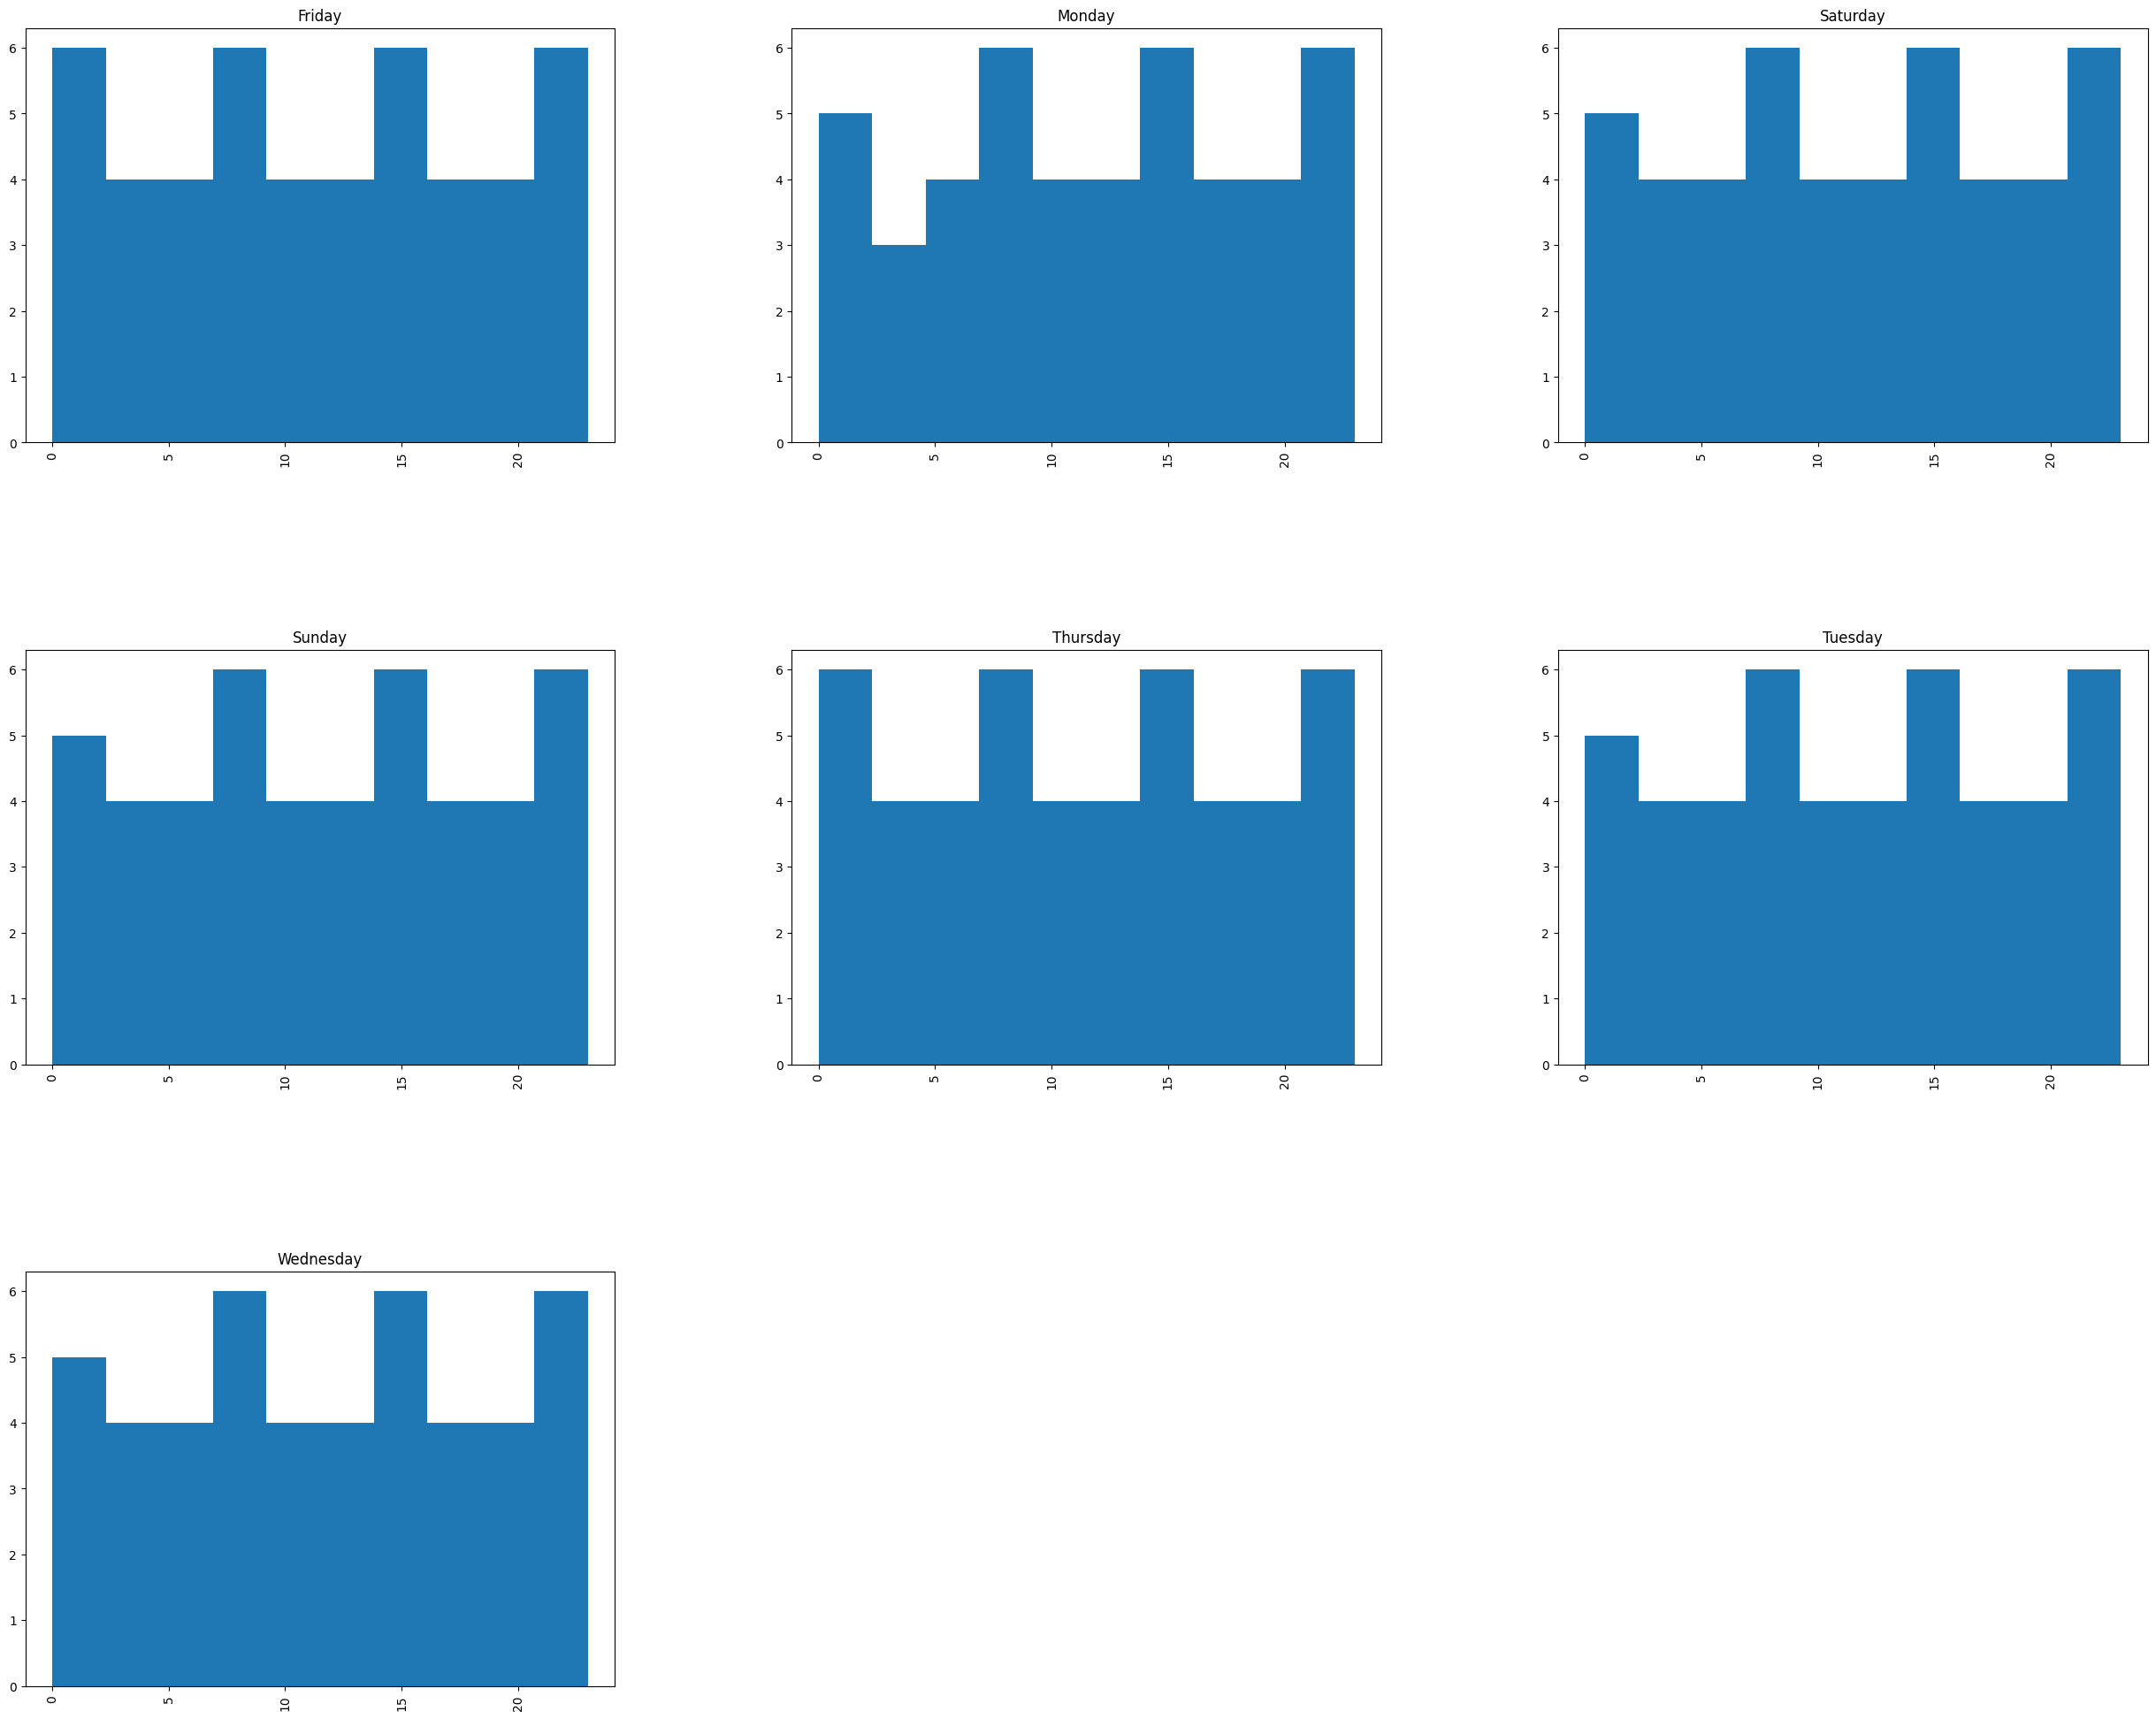

In [ ]:
histogram = df_simplified.hist(by='Day_of_week', column='hour_int', figsize=[30, 25], range=[0, 23], bins=10)

Above are displayed seven histogram from Monday to Sunday by hours of the day. However, the data is hard to interpret. Hence, I will copy all hours of successful trips into a numpy array

In [ ]:
Hours = df_simplified['hour_int'].to_numpy()

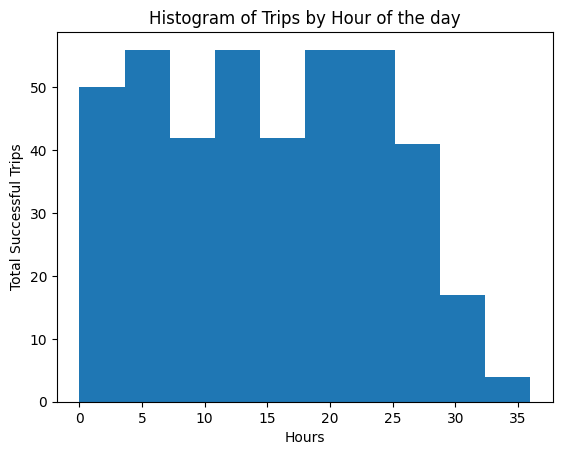

In [ ]:
plt.hist(Hours, bins=10)
plt.xlabel('Hours')
plt.ylabel('Total Successful Trips')
plt.title('Histogram of Trips by Hour of the day')
plt.savefig('histogram.png', dpi=300, bbox_inches='tight')
plt.show()

The above pyplot array shows the total number of successful trips by hours of the day in a typical day

To answer the third question, I decided to filter out all those providers that are not classified as Primary.

In [ ]:
df

,Status,ProviderType,Outcome,Day_of_week,Day_of_trip,Weekday,RequestTime,PromiseTime,Departure_Pickup,Arrival_Pickup,Arrival_Destination,Anchor,PickCounty,PickZip,DropCounty,DropZip,TripMiles,hours,minutes
0,CX,E-Hail,0,Friday,Weekday,1,06:30,05:35,00:00,00:00,00:00,P,Kings County,11228,Kings County,11219,0.00,00,00
1,S,E-Hail,1,Friday,Weekday,1,23:00,22:03,00:00,00:00,00:00,A,Richmond County,10308,Richmond County,10307,7.63,00,00
2,CX,E-Hail,0,Friday,Weekday,1,15:30,14:48,00:00,00:00,00:00,P,New York County,10022,Richmond County,10301,0.00,00,00
3,CX,E-Hail,0,Friday,Weekday,1,14:30,14:30,00:00,00:00,00:00,P,Kings,11209,Richmond,10314,0.00,00,00
4,S,Primary,1,Friday,Weekday,1,09:30,09:30,09:38,00:00,09:55,P,Kings,11203,Kings,11226,0.90,09,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164008,TAXI,E-Hail,1,Friday,Weekday,1,15:20,00:00,00:00,00:00,00:00,P,Queens,11361,Queens,11358,0.00,00,00
1164009,S,Primary,1,Thursday,Weekday,1,09:47,09:47,09:46,09:33,10:16,P,Bronx,10475,Westchester,10701,7.65,10,16
1164010,DELETED,Deleted,0,Saturday,Weekend,0,25:45,00:00,00:00,00:00,00:00,P,New York,10020,Kings,11206,0.00,00,00
1164011,S,Primary,1,Friday,Weekday,1,12:15,12:15,12:25,11:54,12:47,P,New York,10065,New York,10003,3.39,12,47


In [ ]:
df_zip.drop(columns=["hours"], inplace=True, errors='ignore')

In [ ]:
df_zip.drop(columns=["minutes"], inplace=True, errors='ignore')

In [ ]:
#df_zip.drop(columns=["H_PK_Int"], inplace=True, errors='ignore')

In [ ]:
df_zip = df.drop(df[(df.ProviderType != 'Primary')].index)

In [ ]:
df_zip

,Status,ProviderType,Outcome,Day_of_week,Day_of_trip,Weekday,RequestTime,PromiseTime,Departure_Pickup,Arrival_Pickup,Arrival_Destination,Anchor,PickCounty,PickZip,DropCounty,DropZip,TripMiles,hours,minutes
4,S,Primary,1,Friday,Weekday,1,09:30,09:30,09:38,00:00,09:55,P,Kings,11203,Kings,11226,0.90,09,55
5,S,Primary,1,Friday,Weekday,1,11:15,11:15,11:20,11:15,12:46,P,Kings,11203,New York,10004,8.31,12,46
6,S,Primary,1,Friday,Weekday,1,21:10,21:10,21:42,21:40,23:03,P,New York,10004,Kings,11203,8.31,23,03
8,S,Primary,1,Friday,Weekday,1,07:15,07:15,07:20,07:14,07:32,P,Kings,11221,Kings,11213,1.13,07,32
9,S,Primary,1,Friday,Weekday,1,09:45,09:45,10:01,09:57,11:03,P,Queens,11429,New York,10031,19.93,11,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163940,S,Primary,1,Tuesday,Weekday,1,15:25,13:15,13:14,13:14,15:23,P,New York,10035,Bronx,10469,9.52,15,23
1163945,S,Primary,1,Monday,Weekday,1,16:30,16:30,16:47,16:43,17:54,P,Kings,11235,New York,10023,15.21,17,54
1163986,S,Primary,1,Monday,Weekday,1,22:00,22:00,22:08,21:54,23:00,P,Queens,11040,Kings,11225,19.08,23,00
1164009,S,Primary,1,Thursday,Weekday,1,09:47,09:47,09:46,09:33,10:16,P,Bronx,10475,Westchester,10701,7.65,10,16


In [ ]:
df_shortened = df_zip.drop(df_zip[(df_zip.Arrival_Pickup < '06:00') | (df_zip.Arrival_Pickup > '10:00')].index)

In [ ]:
df_shortened['Arrival_Pickup'].max()

'10:00'

In [ ]:
df_shortened['Arrival_Pickup'].min()

'06:00'

In [ ]:
df_pickup = df_shortened.drop(df_shortened[(df_shortened.Outcome != 1)].index)

In [ ]:
df_pickup

,Status,ProviderType,Outcome,Day_of_week,Day_of_trip,Weekday,RequestTime,PromiseTime,Departure_Pickup,Arrival_Pickup,Arrival_Destination,Anchor,PickCounty,PickZip,DropCounty,DropZip,TripMiles,hours,minutes
8,S,Primary,1,Friday,Weekday,1,07:15,07:15,07:20,07:14,07:32,P,Kings,11221,Kings,11213,1.13,07,32
9,S,Primary,1,Friday,Weekday,1,09:45,09:45,10:01,09:57,11:03,P,Queens,11429,New York,10031,19.93,11,03
11,S,Primary,1,Friday,Weekday,1,07:30,07:30,07:31,07:30,09:01,P,Kings,11236,Kings,11217,7.19,09,01
20,S,Primary,1,Friday,Weekday,1,10:00,10:00,10:05,09:56,10:51,P,New York,10016,Kings,11206,5.28,10,51
24,S,Primary,1,Friday,Weekday,1,07:30,07:30,07:37,07:37,08:27,P,Richmond,10306,New York,10017,19.65,08,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163812,S,Primary,1,Friday,Weekday,1,05:50,05:59,06:09,06:01,06:47,P,New York,10037,New York,10003,7.82,06,47
1163816,S,Primary,1,Wednesday,Weekday,1,08:00,08:24,08:26,08:22,09:27,P,Queens,11374,New York,10001,8.79,09,27
1163921,S,Primary,1,Monday,Weekday,1,06:00,06:29,06:40,06:37,08:00,P,Queens,11435,Kings,11238,9.76,08,00
1163937,S,Primary,1,Tuesday,Weekday,1,09:30,09:30,09:34,09:27,10:11,P,Kings,11234,Kings,11226,3.28,10,11


In [ ]:
df_pickup.groupby('Arrival_Pickup')['PickZip'].value_counts().reset_index(name='Counts')

,Arrival_Pickup,PickZip,Counts
0,06:00,10314,7
1,06:00,11212,7
2,06:00,11226,6
3,06:00,11233,6
4,06:00,10303,5
...,...,...,...
19976,10:00,11417,1
19977,10:00,11426,1
19978,10:00,11428,1
19979,10:00,11580,1


In [ ]:
zipcode_counts = df_pickup.groupby('PickZip')['Arrival_Pickup'].count()

Calling the method count(), I learned the frequency of rush hour arrivals by zipcodes

In [ ]:
top_zipcodes = zipcode_counts.sort_values(ascending=False).head(10)

The above methods output in descending order the first ten zipcodes with the highest count of arrival times

In [ ]:
top_zipcodes

PickZip
10314    1158
10304     848
11212     838
11207     807
10301     754
10306     715
11434     711
11233     610
11691     603
11236     584
Name: Arrival_Pickup, dtype: int64

I call the method sort_values to order pickup zipcodes by highest frequency of arrivals

I instruct Pandas to select all rows except the first 10